In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import seaborn as sns

In [3]:
import time
from datetime import datetime

In [4]:
flight = pd.read_excel('Data_Train.xlsx')

In [5]:
flight.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h 0m,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [6]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
flight.dropna(inplace=True)

In [9]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
flight['Journey_day'] = pd.to_datetime(flight.Date_of_Journey,format="%d/%m/%y",exact=False).dt.day

In [11]:
flight['Journey_month'] = pd.to_datetime(flight.Date_of_Journey,format="%d/%m/%y",exact=False).dt.month

In [12]:
flight.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h 0m,2 stops,No info,13882,9,6


In [13]:
flight.drop('Date_of_Journey',axis=1,inplace=True)

In [14]:
flight.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [15]:
flight['Deep_hour'] = pd.to_datetime(flight['Dep_Time']).dt.hour

In [16]:
flight['Deep_min'] = pd.to_datetime(flight['Dep_Time']).dt.minute

In [17]:
flight.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Deep_hour,Deep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [18]:
flight.drop('Dep_Time',axis=1,inplace=True)

In [19]:
flight.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Deep_hour,Deep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [20]:
flight['Arrival_hour'] = pd.to_datetime(flight['Arrival_Time']).dt.hour

flight['Arrival_min'] = pd.to_datetime(flight['Arrival_Time']).dt.minute

flight.drop('Arrival_Time',axis=1,inplace=True)

In [21]:
flight.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Deep_hour,Deep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25


In [22]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Journey_day      10682 non-null  int64 
 9   Journey_month    10682 non-null  int64 
 10  Deep_hour        10682 non-null  int64 
 11  Deep_min         10682 non-null  int64 
 12  Arrival_hour     10682 non-null  int64 
 13  Arrival_min      10682 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 1.2+ MB


In [23]:
s=pd.to_timedelta(flight['Duration'])
flight['Duration_hours']=s.dt.components['hours']
flight['Duration_min']=s.dt.components['minutes']

In [24]:
flight.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Deep_hour,Deep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25,19,0


In [25]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Journey_day      10682 non-null  int64 
 9   Journey_month    10682 non-null  int64 
 10  Deep_hour        10682 non-null  int64 
 11  Deep_min         10682 non-null  int64 
 12  Arrival_hour     10682 non-null  int64 
 13  Arrival_min      10682 non-null  int64 
 14  Duration_hours   10682 non-null  int64 
 15  Duration_min     10682 non-null  int64 
dtypes: int64(9), object(7)
memory usage: 1.4+ MB


In [26]:
flight.drop('Duration',axis=1,inplace=True)

In [27]:
flight.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Deep_hour,Deep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0


In [28]:
flight['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

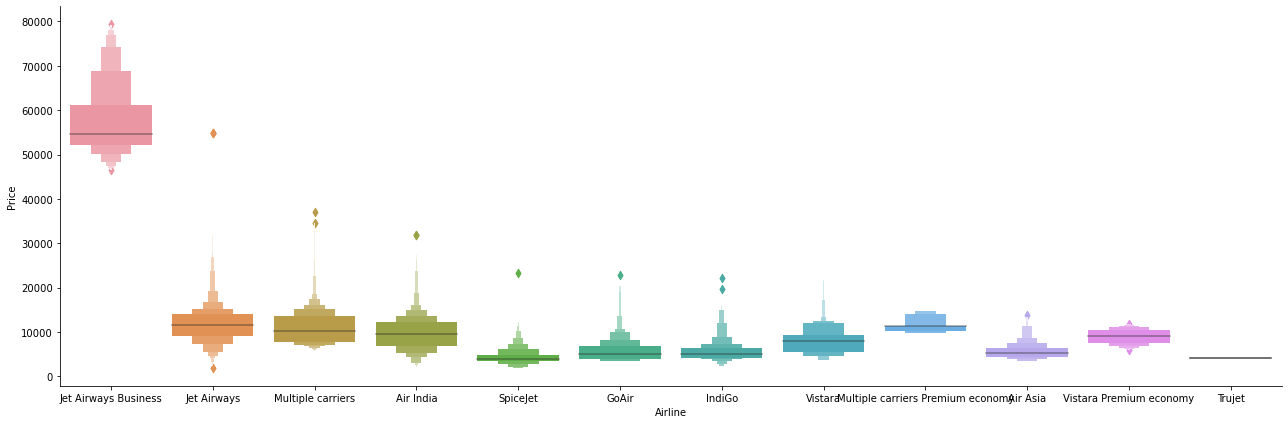

In [29]:
sns.catplot(y ='Price',x='Airline',data = flight.sort_values('Price',ascending=False),kind ='boxen',height = 6,aspect =3)
plt.show()

In [30]:
Airline = flight[['Airline']]

Airline = pd.get_dummies(Airline, drop_first=True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [31]:
flight['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

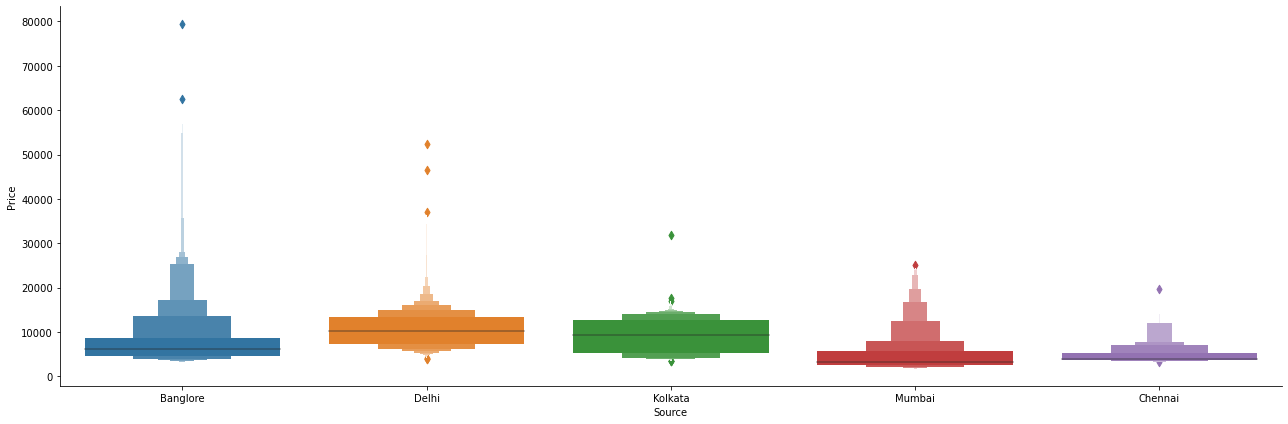

In [32]:
sns.catplot(y ='Price',x='Source',data = flight.sort_values('Price',ascending=False),kind ='boxen',height = 6,aspect =3)
plt.show()

In [33]:
Source = flight[['Source']]

Source = pd.get_dummies(Source, drop_first=True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [34]:
flight['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [35]:
Destination = flight[['Destination']]

Destination = pd.get_dummies(Destination, drop_first=True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [37]:
flight['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [38]:
flight.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [39]:
flight.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Deep_hour,Deep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25


In [40]:
flight['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [41]:
flight['Total_Stops'] = flight['Total_Stops'].astype('category')
flight['Total_Stops'] = flight['Total_Stops'].cat.codes

In [43]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10682 non-null  object
 1   Source          10682 non-null  object
 2   Destination     10682 non-null  object
 3   Total_Stops     10682 non-null  int8  
 4   Price           10682 non-null  int64 
 5   Journey_day     10682 non-null  int64 
 6   Journey_month   10682 non-null  int64 
 7   Deep_hour       10682 non-null  int64 
 8   Deep_min        10682 non-null  int64 
 9   Arrival_hour    10682 non-null  int64 
 10  Arrival_min     10682 non-null  int64 
 11  Duration_hours  10682 non-null  int64 
 12  Duration_min    10682 non-null  int64 
dtypes: int64(9), int8(1), object(3)
memory usage: 1.1+ MB


In [45]:
flight = pd.concat([flight,Airline,Source,Destination], axis=1)

In [47]:
flight.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Deep_hour,Deep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,4,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,1,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,0,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,0,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [48]:
flight.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [49]:
flight.head(2)

,Total_Stops,Price,Journey_day,Journey_month,Deep_hour,Deep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,1,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0


In [50]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int8 
 1   Price                                      10682 non-null  int64
 2   Journey_day                                10682 non-null  int64
 3   Journey_month                              10682 non-null  int64
 4   Deep_hour                                  10682 non-null  int64
 5   Deep_min                                   10682 non-null  int64
 6   Arrival_hour                               10682 non-null  int64
 7   Arrival_min                                10682 non-null  int64
 8   Duration_hours                             10682 non-null  int64
 9   Duration_min                               10682 non-null  int64
 10  Airline_Air India                          106

In [52]:
flight.shape

(10682, 30)

In [56]:
flight.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Deep_hour',
       'Deep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [62]:
flight.iloc[:,2:].corr()

,Journey_day,Journey_month,Deep_hour,Deep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Journey_day,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.013416,-0.008940,-0.032490,-0.003122,...,-0.020115,0.006611,0.100088,-0.060558,-0.014030,0.100088,0.002632,-0.014030,0.006611,-0.075254
Journey_month,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.046494,-0.040897,-0.045981,-0.004494,...,-0.019797,0.005650,0.139222,0.087177,-0.039352,0.139222,0.090490,-0.039352,0.005650,-0.453685
Deep_hour,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.011526,-0.023707,-0.012879,-0.016373,...,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
Deep_min,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.025085,0.092485,-0.045688,0.076751,...,-0.011380,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129
Arrival_hour,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,-0.012782,-0.118309,0.088872,0.018526,...,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366
Arrival_min,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.128140,0.151628,0.061231,0.096839,...,0.000314,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271
Duration_hours,-0.013416,0.046494,0.011526,-0.025085,-0.012782,-0.128140,1.000000,-0.149376,0.094447,-0.071138,...,-0.014958,-0.171636,0.340543,0.050579,-0.237800,0.340543,-0.314457,-0.237800,-0.171636,0.005014
Duration_min,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.149376,1.000000,-0.033427,0.067215,...,0.004952,-0.098823,-0.154126,0.013761,-0.018761,-0.154126,0.218207,-0.018761,-0.098823,0.079866
Airline_Air India,-0.032490,-0.045981,-0.012879,-0.045688,0.088872,0.061231,0.094447,-0.033427,1.000000,-0.060221,...,-0.007421,-0.051068,0.001257,0.023606,0.022268,0.001257,-0.068370,0.022268,-0.051068,0.053072
Airline_GoAir,-0.003122,-0.004494,-0.016373,0.076751,0.018526,0.096839,-0.071138,0.067215,-0.060221,1.000000,...,-0.002280,-0.026156,-0.009049,-0.042921,-0.035933,-0.009049,0.099863,-0.035933,-0.026156,0.017573


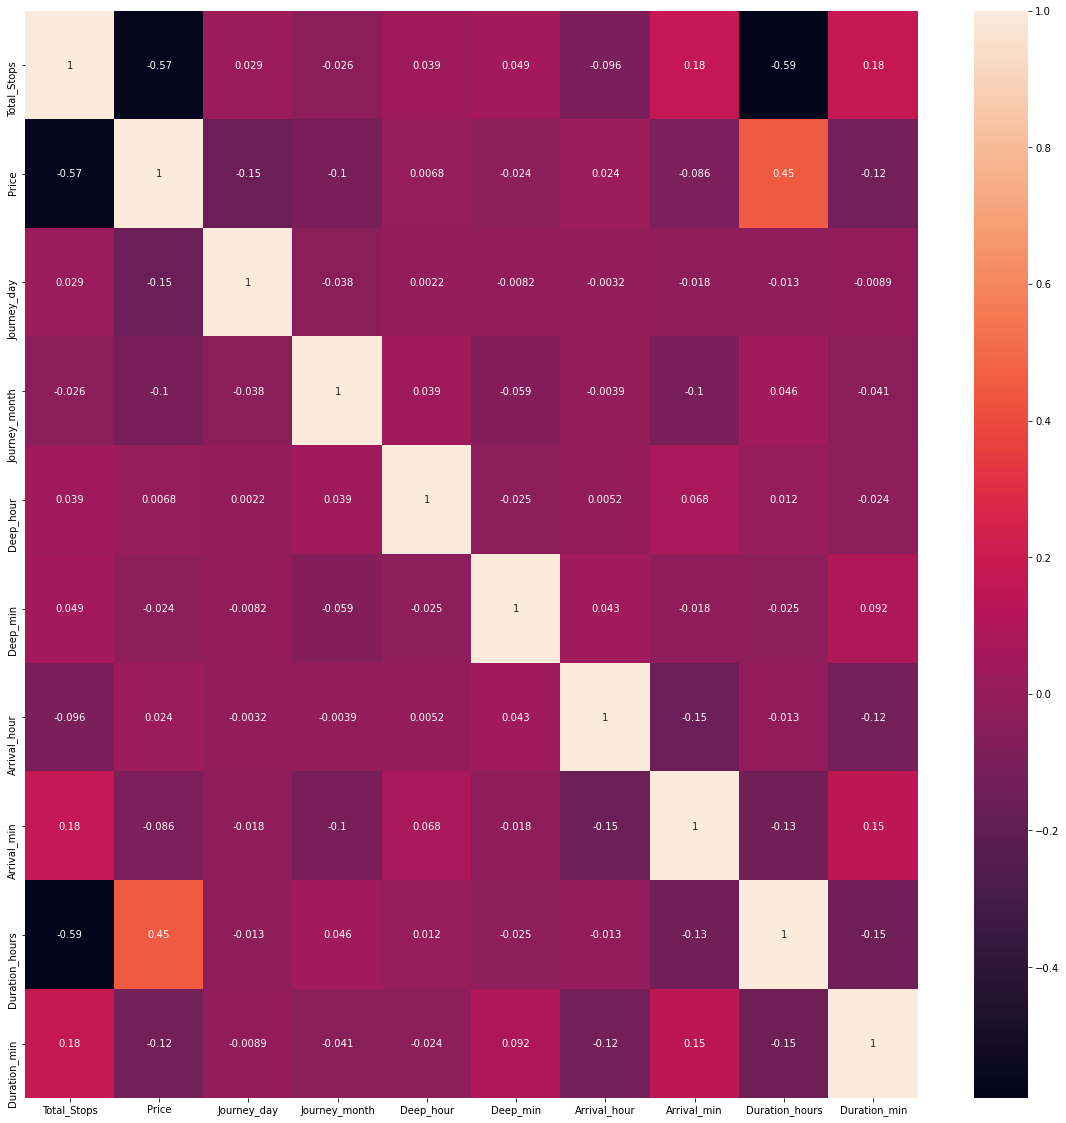

In [79]:
plt.figure(figsize = (20,20))
sns.heatmap(flight.iloc[:,:10].corr(),annot=True)
plt.show()

In [80]:
X = flight.drop('Price',axis=1)
y = flight['Price']

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
import statsmodels.api as sm

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [83]:
X_test.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Deep_hour', 'Deep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

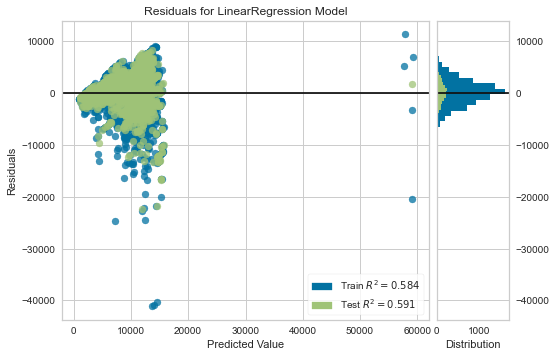

In [85]:
model = LinearRegression()
visual = ResidualsPlot(model)
visual.fit(X_train,y_train)
visual.score(X_test,y_test)
visual.poof()

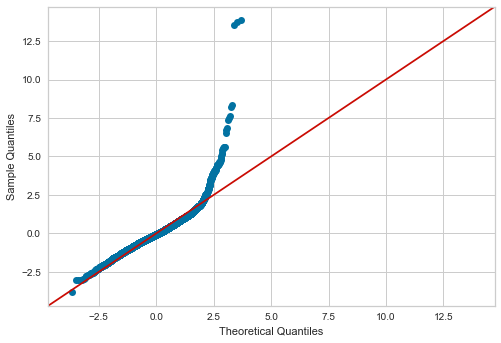

In [86]:
lin_reg = sm.OLS(y_train,X_train).fit()
res = lin_reg.resid
sm.qqplot(res,fit= True,line='45')
plt.show()

In [87]:
lin_reg = sm.OLS(y_train,X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     477.8
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:00:25   Log-Likelihood:                -80453.
No. Observations:                8545   AIC:                         1.610e+05
Df Residuals:                    8519   BIC:                         1.611e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Total_Stops                                -619.4296     30.818    -20.100      0.000    -679.840    -559.019
Journey_day                                 -71.8066      3.855    -18.628      0.000     -79.363     -64.250
Journey_month                              -396.5423     31.771    -12.481      0.000    -458.820    -334.264
Deep_hour                                     8.1729      5.757      1.420      0.156      -3.112      19.458
Deep_min                                      3.0823      1.803      1.710      0.087      -0.452       6.617
Arrival_hour                                -19.8529      4.903     -4.049      0.000     -29.465     -10.241
Arrival_min                                   5.7698      2.086      2.766      0.006       1.681       9.858
Duration_hours                               50.8432      6.512      7.808      0.000      38.078      63.608
Duration_min                                  0.8138      2.029      0.401      0.688      -3.164       4.792
Airline_Air India                          3161.7616    209.572     15.087      0.000    2750.951    3572.573
Airline_GoAir                               143.5197    301.798      0.476      0.634    -448.077     735.117
Airline_IndiGo                              258.9481    204.942      1.264      0.206    -142.787     660.683
Airline_Jet Airways                        4774.7227    201.575     23.687      0.000    4379.587    5169.858
Airline_Jet Airways Business               4.914e+04   1347.195     36.475      0.000    4.65e+04    5.18e+04
Airline_Multiple carriers                  3398.5692    226.362     15.014      0.000    2954.844    3842.294
Airline_Multiple carriers Premium economy  3579.3904    852.401      4.199      0.000    1908.477    5250.304
Airline_SpiceJet                           -132.9153    225.044     -0.591      0.555    -574.055     308.225
Airline_Trujet                            -1944.9626   2987.454     -0.651      0.515   -7801.097    3911.172
Airline_Vistara                            2273.7413    247.251      9.196      0.000    1789.070    2758.413
Airline_Vistara Premium economy            3374.8565   2988.392      1.129      0.259   -2483.117    9232.830
Source_Chennai                             4683.0302    184.201     25.423      0.000    4321.952    5044.109
Source_Delhi                               5036.4386    154.941     32.505      0.000    4732.716    5340.161
Source_Kolkata                             9393.3773    313.118     29.999      0.000    8779.590       1e+04
Source_Mumbai                              3810.6419    172.066     22.146      0.000    3473.351    4147.933
Destination_Cochin                         5036.4386    154.941     32.505      0.000    4732.716    5340.161
Des

In [88]:
len(flight)

10682

In [89]:
len(X_test),len(X_train)

(2137, 8545)

In [90]:
len(y_test),len(y_train)

(2137, 8545)

### LINEAR REGRESSION

In [91]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
pred = linear_reg.predict(X_test)

In [92]:
pred

array([10181.38887719,  8093.6606291 ,  9760.16265108, ...,
        7649.20581213, 11942.4980569 , 11575.81392542])

In [97]:
linear_reg.score(X_train,y_train)

0.5837054462649789

In [96]:
linear_reg.score(X_test,y_test)

0.5914523376307013

In [93]:
from sklearn.metrics import r2_score

In [94]:
r2_score(y_test,pred)

0.5914523376307013

In [114]:
def absolute_percentage_error(y_true,pred):
    return np.mean((np.abs(y_true-pred)/y_true))*100

In [115]:
absolute_percentage_error(y_test,pred)

25.809071602482074

In [120]:
print("MAE: ", metrics.mean_absolute_error(y_test,pred))
print("MSE: ", metrics.mean_squared_error(y_test,pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE:  2122.072357661827
MSE:  8809127.70711145
RMSE:  2968.0174708231502


### DECISION TREE REGRESSOR

In [95]:
from sklearn.tree import DecisionTreeRegressor

In [98]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)

In [99]:
y_pred

array([16840.,  4959.,  8452., ...,  7452., 13339., 14335.])

In [100]:
dtr.score(X_train,y_train)

0.9691496355350125

In [101]:
dtr.score(X_test,y_test)

0.7504392555313462

In [102]:
r2_score(y_test,y_pred)

0.7504392555313462

In [121]:
from sklearn import metrics

In [122]:
print("MAE: ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE:  1333.8977148650758
MSE:  5381042.828532861
RMSE:  2319.7074877089267


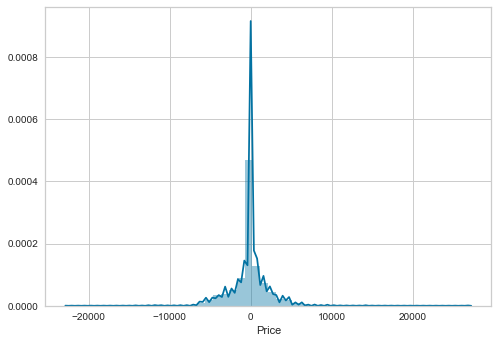

In [111]:
sns.distplot(y_test-y_pred)
plt.show()

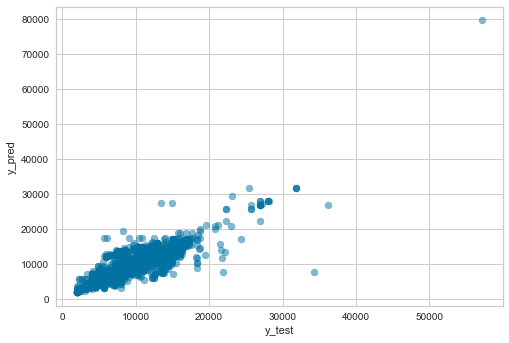

In [104]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### RANDOM FOREST REGRESSOR

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_predict = rfr.predict(X_test)

In [107]:
y_predict

array([16933.43      ,  5665.3       ,  8931.25      , ...,
        6588.6       , 12845.47630952, 13220.83266667])

In [108]:
rfr.score(X_train,y_train)

0.9533432535702125

In [109]:
rfr.score(X_test,y_test)

0.8377936595898262

In [110]:
r2_score(y_test,y_predict)

0.8377936595898262

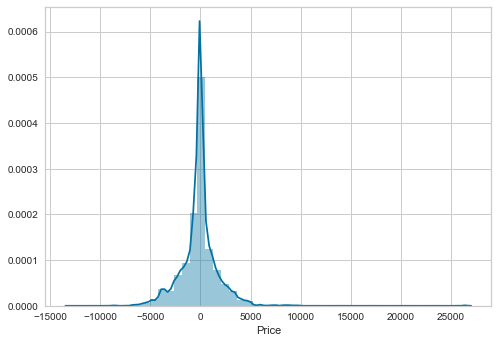

In [112]:
sns.distplot(y_test-y_predict)
plt.show()

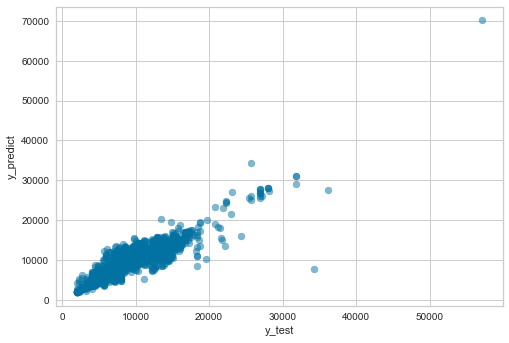

In [113]:
plt.scatter(y_test, y_predict, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_predict")
plt.show()

### EVALUATION

In [116]:
from sklearn import metrics

In [118]:
print("MAE: ", metrics.mean_absolute_error(y_test,y_predict))
print("MSE: ", metrics.mean_squared_error(y_test,y_predict))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

MAE:  1158.4014662807297
MSE:  3497502.248060327
RMSE:  1870.161021960496
